# Session 7 - Neural Networks for image data

In this notebook, we're going to see how we can train simple neural networks using ```TensorFlow```, a machine learning and deep learning framework developed by Google Research. You can find the documentation [here](https://www.tensorflow.org/).

We're still working on greyscale images at this point - next week, we'll start thinking about working with full colour images.

In [1]:
# generic tools
import numpy as np

# tools from sklearn
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

2023-03-17 12:32:44.725594: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download data, train-test split

We're going to download the ```MNIST``` dataset again, so that we compare this pipeline to the baseline benchmarks we created previously.

In [2]:
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

# normalise data
data = data.astype("float")/255.0

# split data
(X_train, X_test, y_train, y_test) = train_test_split(data,
                                                    labels, 
                                                    test_size=0.2) #80% train data, 20% test data

/home/coder/.local/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# convert labels to one-hot encoding
lb = LabelBinarizer() # one-hot encoding = turning a string into a vector of numbers. All the possible labels as vectors of numbers
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [5]:
# showcasing that the one-hot encoding has worked
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

## Define neural network architecture using ```tf.keras```

We're now going to create our neural network using ```TensorFlow```. In particular, we're going to using the ```keras``` wrapper which makes the syntax a bit simpler to work with.

The code below makes a fully-connected, feed-forward neural network with the following features:

- Input layer of 784
- One hidden layer of 256
- Second hidden layer of 128
- An output layer of 10 nodes

In [6]:
# define architecture 784x256x128x10
model = Sequential() # a sequential model or "feed forward neural network"
model.add(Dense(256, # adding a dense layer because its fully connected
                input_shape=(784,), # the input shape is dependant on the size of the input data
                activation="relu")) # the type of activation function used. Then we avoid vanishing 
model.add(Dense(128, # adding the second hidden layer which takes 128 nodes with a relu activation function
                activation="relu"))
model.add(Dense(10, # last layer / output layer
                activation="softmax")) #function predicting 1 or 0. A generalized version of a logistic regression

#the comma after the first number after dense signals that there could be more numbers if its a colour image with 3 dimension (3 color histograms)

2023-03-17 12:58:25.455248: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Show summary of model architecture

In [7]:
model.summary() # make sure that the model is structured in the way that we want it to be

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Visualise model layers

If you want to do view this, there are some extra things that you can install - ```TensorFlow``` gives you instructions to do that.

**NB:** This might not work on Windows (but I'm not sure).

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Compile model loss function, optimizer, and preferred metrics

One of the big differences with ```TensorFlow``` vs ```scikit-learn``` is that we have much more control over how the optimization algorithm works.

We initalize the optimizer and then we have to *compile* the model.

In [8]:
# train model using SGD
sgd = SGD(0.01) # stocastic grading descent = the learning rate of 0.01. The higher the value, the quicker its gonna learn. If it tries to learn too quickly it might overshoot and not find the most optimal way of solving a problem
model.compile(loss="categorical_crossentropy", # .compile (makes it a computational graph structure)
              optimizer=sgd, # we use the sgd previously defined
              metrics=["accuracy"]) # metric were trying to improve is accuracy. it can also be recall, precision or f1 score

# we want a model that returns the best in terms of accuracy
# "categorical_crossentropy" technical name of the loss function. 

## Train model and save history

Once we've done that, it's just a case of fitting the model to the data.

In [10]:
history = model.fit(X_train, y_train,  #creating history which will be beneficial later
                    epochs=10, # number of epochs
                    batch_size=32)  #look at 32 images, once u have learned from them, then go back improve the model and do it again

Epoch 1/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.1777 - accuracy: 0.9492
Epoch 2/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1581 - accuracy: 0.9539
Epoch 3/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1419 - accuracy: 0.9592
Epoch 4/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1283 - accuracy: 0.9629
Epoch 5/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1171 - accuracy: 0.9665
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1069 - accuracy: 0.9694
Epoch 7/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0981 - accuracy: 0.9720
Epoch 8/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0907 - accuracy: 0.9740
Epoch 9/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0841 - accuracy: 0.9761
Epoch 10/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.078

## Visualise using ```matplotlib```

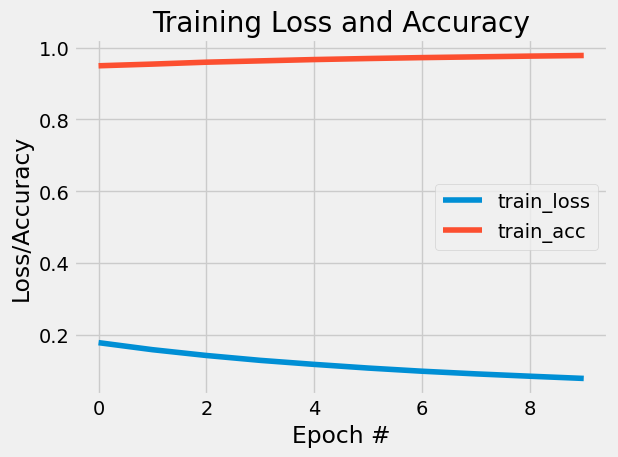

In [12]:
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

## Classifier metrics

We need to do a little bit of extra work to get the classification report to work properly.

In [13]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=32)

[INFO] evaluating network...
438/438 [==============================] - 1s 2ms/step


In [14]:
predictions

array([[3.4039891e-03, 1.5356763e-04, 1.7313610e-04, ..., 1.5594328e-02,
        3.3172473e-04, 5.4752282e-03],
       [1.6528863e-07, 1.8775583e-05, 9.9639714e-01, ..., 1.8187076e-03,
        5.7227025e-04, 3.9015131e-06],
       [8.9482064e-06, 1.0995661e-03, 2.9079360e-05, ..., 1.0708646e-04,
        1.1125252e-03, 1.3464284e-03],
       ...,
       [1.0285574e-04, 4.4432592e-02, 6.1336723e-05, ..., 2.0183071e-04,
        1.1536470e-03, 2.2754689e-01],
       [1.0487334e-08, 3.7848891e-05, 9.9949723e-01, ..., 2.7877962e-07,
        6.2255776e-06, 1.0136700e-07],
       [1.3944974e-07, 8.0425807e-06, 3.4469966e-05, ..., 2.2773794e-08,
        3.4473137e-06, 2.8208416e-07]], dtype=float32)

In [15]:
print(classification_report(y_test.argmax(axis=1), # for everything in y-test give us the biggest value of that array
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))
# classification report compares the highest value of each array 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1354
           1       0.98      0.98      0.98      1541
           2       0.98      0.96      0.97      1419
           3       0.96      0.96      0.96      1416
           4       0.97      0.97      0.97      1324
           5       0.96      0.97      0.96      1244
           6       0.98      0.98      0.98      1382
           7       0.97      0.97      0.97      1473
           8       0.97      0.95      0.96      1443
           9       0.95      0.97      0.96      1404

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



### Task

1. Turn the above into a ```.py``` script which can be run from the command line. Use argparse if you think it's relevant!
2. Use this notebook as a template to train a neural network on the ```Cifar-10``` dataset instead of ```MNIST```.
3. Turn *that* notebook into a ```.py``` script, too